In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
dataset = pd.read_csv("datasets/house-prices.csv")
dataset.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [4]:
dataset.isna().sum()

Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

In [5]:
dataset.isnull().sum()

Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

In [6]:
dataset.columns

Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

In [7]:
# Dropping tbe home feature
dataset.drop(columns=['Home'],axis = 1 ,inplace=True)

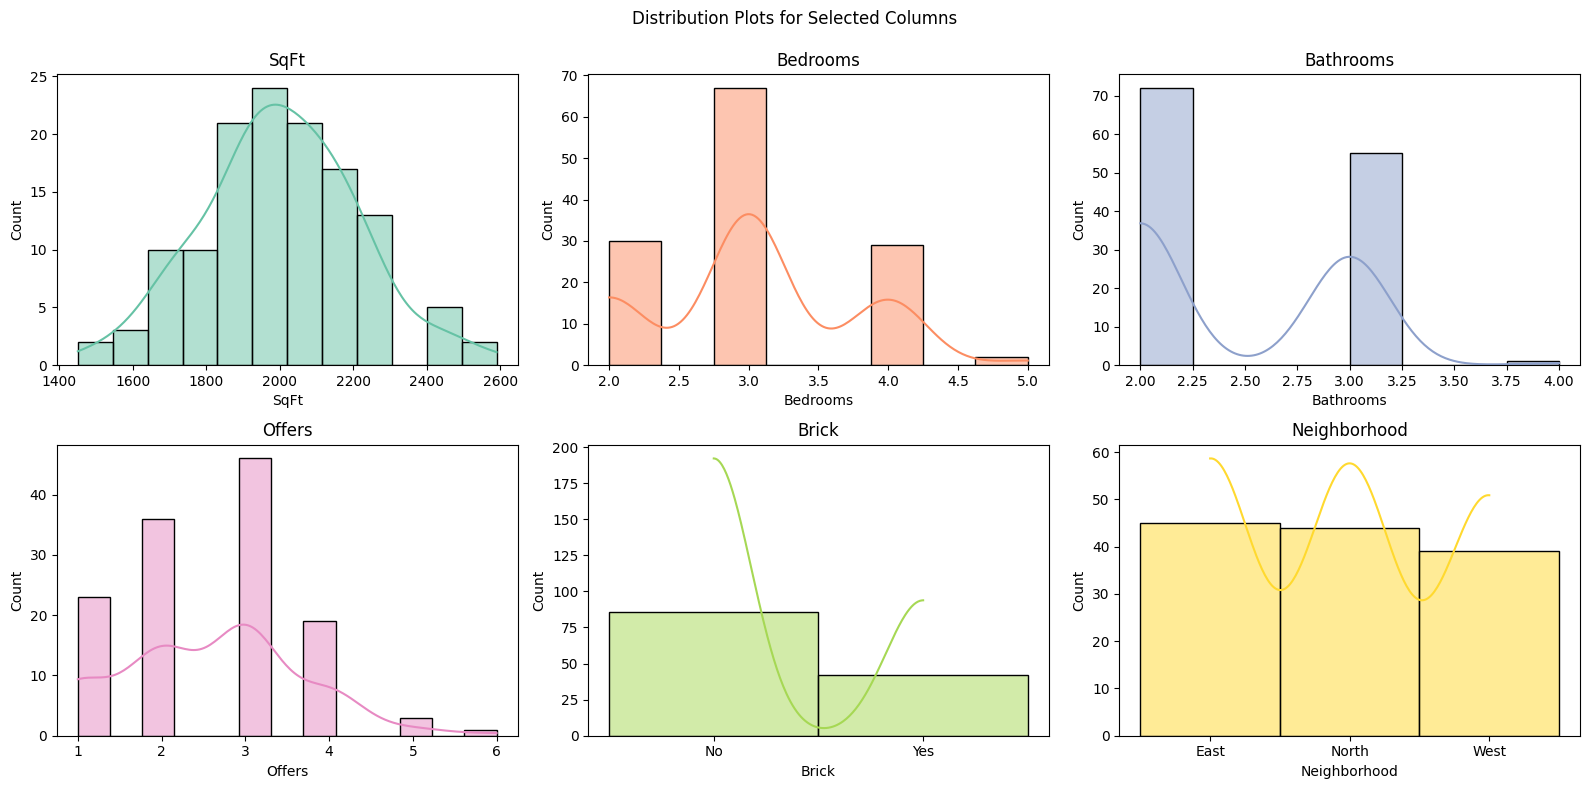

In [8]:
columns_to_plot = ['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick','Neighborhood']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
fig.suptitle("Distribution Plots for Selected Columns")
palette = sns.color_palette("Set2")

# Create distribution plots for each column
for i, (column, color) in enumerate(zip(columns_to_plot, palette)):
    row = i // 3  
    col = i % 3  
    sns.histplot(dataset[column], kde=True, color=color, ax=axes[row, col])
    axes[row, col].set_title(column)

plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()

In [9]:
# Mapping categorical to numerical
dataset['Brick'] = dataset['Brick'].map({"No" : 0 ,"Yes":1}).astype(int)
dataset['Neighborhood'] = dataset["Neighborhood"].map({"East" : 0 ,"North":1 ,"West":2}).astype(int)
dataset.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,114300,1790,2,2,2,0,0
1,114200,2030,4,2,3,0,0
2,114800,1740,3,2,1,0,0
3,94700,1980,3,2,3,0,0
4,119800,2130,3,3,3,0,0


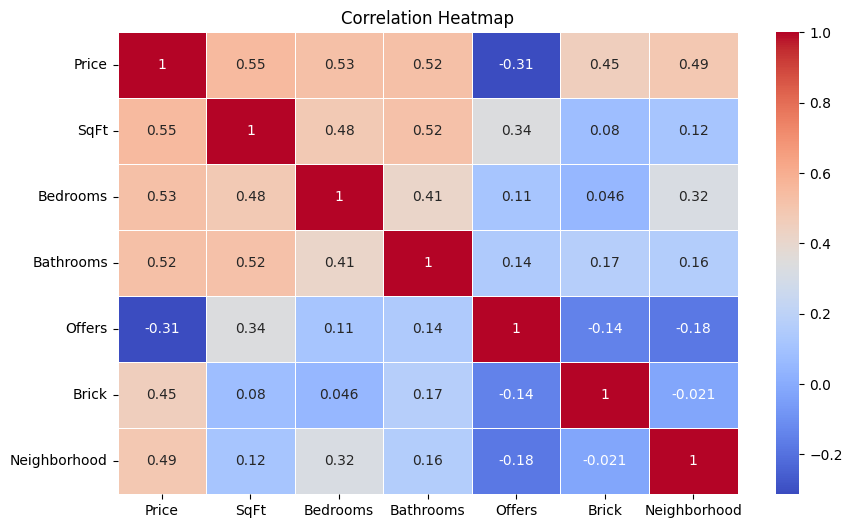

In [10]:

#Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [11]:
X = dataset.drop(columns=["Price"] ,axis = 1)
y= dataset['Price']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [13]:
regression = LinearRegression()

# Fit linear model
regression.fit(X_train, y_train)

LinearRegression()

In [14]:
score = regression.score(X_train, y_train)
score

0.8196436872534434

In [15]:
prediction = regression.predict(X_test)

In [16]:
r2 = r2_score(y_test, prediction)
print(r2)

0.9226709740075849


In [17]:
y_test_metrics = y_test.values.reshape(-1,1)
data_frame = pd.DataFrame({'actual': y_test_metrics.flatten(), 'predicted': prediction.flatten()})
pd.options.display.float_format = '{:.2f}'.format
data_frame.head(10)

,actual,predicted
0,120500,114703.95
1,108500,113034.13
2,126300,130207.85
3,171000,166865.42
4,164800,159065.11
5,103200,95842.00
6,172500,165849.00
7,149300,149219.90
8,100900,97174.00
9,150700,151908.94


In [18]:
dataset.iloc[100]

Price           103200
SqFt              2010
Bedrooms             3
Bathrooms            2
Offers               5
Brick                0
Neighborhood         1
Name: 100, dtype: int64

In [20]:
SqFt = int(input("Enter the the SqFt:"))
Bedrooms = int(input("Enter the number of bedrooms:"))
Bathrooms = int(input("Enter the number of bathrooms:"))
Offers = int(input("Enter the offers received for the House"))
Brick = int(input("Was the House made of Bricks NO :0 ,Yes : 1"))
Neighborhood = int(input("Were the house is located ,East : 0 , North :1 ,West : 2"))
sample = [[SqFt ,Bedrooms ,Bathrooms ,Offers ,Brick ,Neighborhood]]
result = regression.predict(sample)

print(f"Price of the house is {result}")

Price of the house is [95684.78176023]


e:\Kunal_Barve_Task\ML_Tasks\ml_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
